In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('C:/Users/user/Titanic/train.csv',index_col=None)
test_df=pd.read_csv('C:/Users/user/Titanic/test.csv',index_col=None)
Y_test=pd.read_csv('C:/Users/user/Titanic/gender_submission.csv',index_col=None)

In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Filling the misssing value in data

In [8]:
mean_age=train_df['Age'].mean()

In [9]:
train_df=train_df.fillna(mean_age,axis=0)

In [10]:
# No of male and female paasenger survived in titanic

In [11]:
train_df['Sex'].groupby(train_df['Survived']).value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [12]:
train_df[(train_df['Sex']== 'male')]['Sex'].count()

577

In [13]:
# Percentage of  female survived
male_survived=train_df[(train_df['Sex']== 'male') & (train_df['Survived']==1)]['Sex'].count()

total_male= train_df[(train_df['Sex']== 'male')]['Sex'].count()

print("percentage of male survived in titanic {}".format(male_survived/total_male*100))

percentage of male survived in titanic 18.890814558058924


In [14]:
# Percentage of  female survived
female_survived=train_df[(train_df['Sex']== 'female') & (train_df['Survived']==1)]['Sex'].count()

total_female= train_df[(train_df['Sex']== 'female')]['Sex'].count()

print("percentage of female survived in titanic {}".format(female_survived/total_female*100))

percentage of female survived in titanic 74.20382165605095


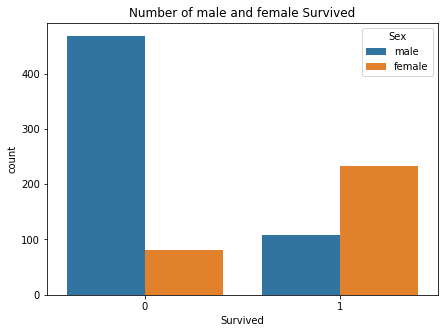

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x=train_df['Survived'],hue=train_df['Sex'])
plt.title("Number of male and female Survived");


In [16]:
#survival based on class Pclass

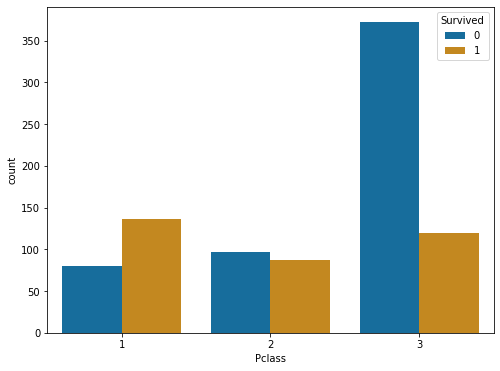

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x=train_df['Pclass'],hue=train_df['Survived'],palette='colorblind')

In [18]:
# Survival rate with people with parch

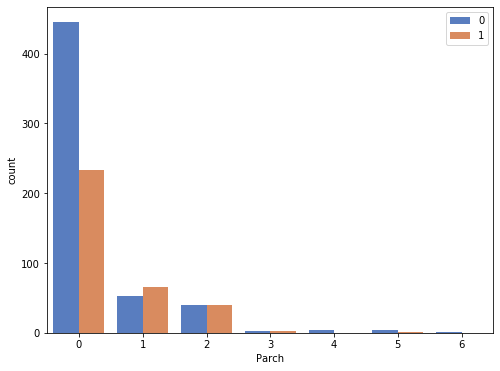

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x=train_df['Parch'],hue=train_df['Survived'],palette='muted')
plt.legend(loc=1);

In [20]:
# Considering necessary feature in train and test set

heat_map=train_df[['Survived','Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Embarked']]

## perform encoding for categorical data {1:'Male',0:'Female'}

In [21]:
# Encoding for train set
heat_map['Sex']=heat_map['Sex'].replace(['male','female'],[0,1])
heat_map['Embarked']=heat_map['Embarked'].replace(['S','C','Q'],[0,1,2])

In [22]:
# plot the heatmap to find coorelation in data

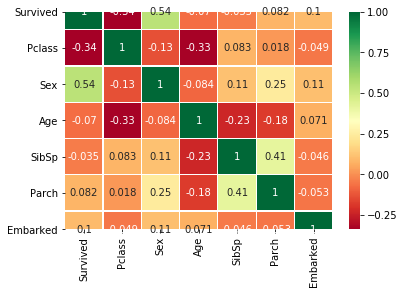

In [23]:
sns.heatmap(heat_map.corr(),cmap='RdYlGn',linewidths=0.2,annot=True);

## Modelling the data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_set=heat_map[['Pclass', 'Sex', 'SibSp','Parch', 'Embarked']]
Y_train=train_df[['Survived']]

In [26]:
X_train,X_test,y_train,y_test=train_test_split(train_set,Y_train,test_size=0.3)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
test_df['Sex']=test_df['Sex'].replace(['male','female'],[0,1])
test_df['Embarked']=test_df['Embarked'].replace(['S','C','Q'],[0,1,2])

In [30]:
test=test_df[['Pclass', 'Sex', 'SibSp','Parch', 'Embarked']]

In [31]:
prediction=model.predict(test)

In [32]:
# Evaluation metrix

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(Y_test['Survived'],prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       1.00      0.97      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418

